In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [6]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

In [7]:
df=pd.read_csv('df_all.csv')

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [7]:
df=df.fillna(-100)
df = df.drop(['Pseudo_ClientID','Pseudo_ClientID@'], axis = 1)
train_x=df.iloc[:,1:]
train_x=train_x.drop('Issue_YN',axis=1)
train_y=df['Issue_YN']

In [9]:
clf = RandomForestClassifier(n_estimators=2000, n_jobs = -1, max_depth = 30)

In [10]:
scores = cross_val_score(clf,train_x,train_y, scoring='accuracy',cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf,train_x,train_y, scoring='f1',cv=5)
print("f1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf,train_x,train_y, scoring='recall',cv=5)
print("recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.00)
f1: 0.52 (+/- 0.04)
recall: 0.43 (+/- 0.04)


In [33]:
def display_importances(feature_importance_df_, doWorst=False, n_feat=50):
    # Plot feature importances
    if not doWorst:
        cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(
            by="importance", ascending=False)[:n_feat].index        
    else:
        cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(
            by="importance", ascending=False)[-n_feat:].index
    
    mean_imp = feature_importance_df_[["feature", "importance"]].groupby("feature").mean()
    df_2_neglect = mean_imp[mean_imp['importance'] < 1e-3]
    print('The list of features with 0 importance: ')
    print(df_2_neglect.index.values.tolist())
    del mean_imp, df_2_neglect
    
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    
    plt.figure(figsize=(10,8))
    sns.barplot(x="importance", y="feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title('Features')
    plt.tight_layout()

The list of features with 0 importance: 
['ACTV_JOB_COUNT+ACTV_WRKR_COUNT', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@max', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@mean', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@min', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@nunique', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@std', 'ACTV_JOB_COUNT+BANK_COUNT', 'ACTV_JOB_COUNT+BANK_COUNT@max', 'ACTV_JOB_COUNT+BANK_COUNT@mean', 'ACTV_JOB_COUNT+BANK_COUNT@min', 'ACTV_JOB_COUNT+BANK_COUNT@nunique', 'ACTV_JOB_COUNT+BANK_COUNT@std', 'ACTV_JOB_COUNT+CHECK_COUNT', 'ACTV_JOB_COUNT+CHECK_COUNT@max', 'ACTV_JOB_COUNT+CHECK_COUNT@mean', 'ACTV_JOB_COUNT+CHECK_COUNT@min', 'ACTV_JOB_COUNT+CHECK_COUNT@nunique', 'ACTV_JOB_COUNT+CHECK_COUNT@std', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@max', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@mean', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@min', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@nunique', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@std', 'ACTV_JOB_COUNT+CLT_TAX_COUNT', 'ACTV_JOB_COUNT+CLT_TAX_COUNT@max', 'ACTV_JOB_COUNT+

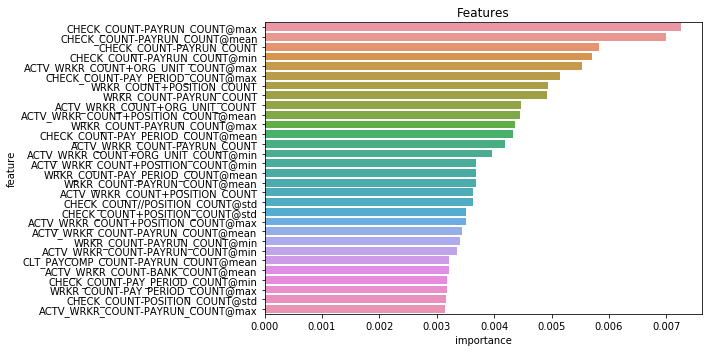

In [14]:
clf.fit(train_x, train_y)
importance_df = pd.DataFrame()
importance_df["feature"] = train_x.columns.tolist()      
importance_df["importance"] = clf.feature_importances_

The list of features with 0 importance: 
['ACTV_JOB_COUNT+ACTV_WRKR_COUNT', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@max', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@mean', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@min', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@nunique', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@std', 'ACTV_JOB_COUNT+BANK_COUNT', 'ACTV_JOB_COUNT+BANK_COUNT@max', 'ACTV_JOB_COUNT+BANK_COUNT@mean', 'ACTV_JOB_COUNT+BANK_COUNT@min', 'ACTV_JOB_COUNT+BANK_COUNT@nunique', 'ACTV_JOB_COUNT+BANK_COUNT@std', 'ACTV_JOB_COUNT+CHECK_COUNT', 'ACTV_JOB_COUNT+CHECK_COUNT@max', 'ACTV_JOB_COUNT+CHECK_COUNT@mean', 'ACTV_JOB_COUNT+CHECK_COUNT@min', 'ACTV_JOB_COUNT+CHECK_COUNT@nunique', 'ACTV_JOB_COUNT+CHECK_COUNT@std', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@max', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@mean', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@min', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@nunique', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@std', 'ACTV_JOB_COUNT+CLT_TAX_COUNT', 'ACTV_JOB_COUNT+CLT_TAX_COUNT@max', 'ACTV_JOB_COUNT+

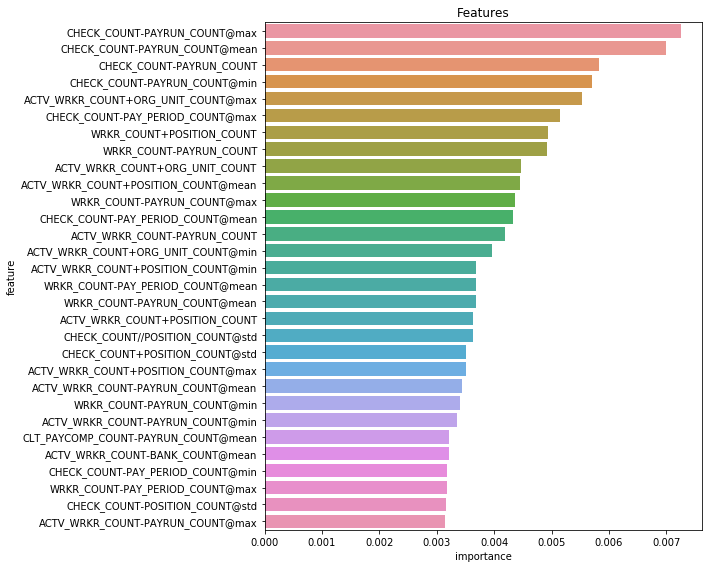

In [34]:
display_importances(feature_importance_df_=importance_df, n_feat=30)

In [36]:
plt.savefig('foo.png')

<Figure size 432x288 with 0 Axes>